In [6]:
import numpy as np
import rebound
import model.mega
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
MEarth = 5.97e24
REarth = 6378.135e3

In [32]:
# Get Starlink constellations near the 550km orbital shell
constellations = {"Starlink-550": list(filter(lambda x: abs(x["ALT"]-550)<40, model.mega.constellations["Starlink"]))}

In [30]:
# Read in observed data
visor,magC,adu,npix,bkgnd,streak,rate = np.genfromtxt("mags-streaks.dat",usecols=(1,2,3,4,5,6,7),unpack=True)
gmag = -2.5*np.log10(adu - npix*bkgnd) + magC -2.5 * np.log10(30* rate/streak)

In [33]:
sims = get_simulations(constellations)

Starlink-550


In [34]:
#def generate_fig(filename=None, latitude=50., months=[-3,0,3], hours=[-3,0,3]): 
def generate_fig(filename=None, latitude=0): 
    # latitude in degrees
    # months since spring equinox
    # hours since midnight
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    hour=-1.5
    month=3.7
    albedo=0.3
    area=4
    xy, mag = get_stereographic_data(sims, latitude=latitude, month=month, hour=hour, albedo=albedo, area=area)
    xyall=xy
    magall=mag
    for hour in np.arange(-1.25,1.6,0.25):
        xy1, mag1 = get_stereographic_data(sims, latitude=latitude, month=month, hour=hour, albedo=albedo, area=area)
        xy=np.append(xy,xy1,axis=0)
        mag=np.append(mag,mag1,axis=0)
    mag+=np.random.normal(0.,0.2,size=len(mag))
    xy2=xy[xy[:,1]<0]
    xy3=np.sqrt(xy2[:,1]**2.+xy2[:,0]**2.)
    xy4=xy2[xy3<np.pi/4.]
    mag2=mag[xy[:,1]<0]
    mag4=mag2[xy3<np.pi/4.]

    gmagbins = np.linspace(1,10,10)
    ax.set_xlabel(r"$m_{g'}$",fontsize=16)
    ax.set_ylabel("Satellites per Bin (model)",fontsize=16)
    magbins = np.linspace(1,10,30)
    ax.set_xlim([3,9])
    ax.set_ylim([0,30])

    n, bins, patches = ax.hist(mag4,bins=magbins,histtype='stepfilled',color="#A4A4A4",lw=3,zorder=-10)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    ax2 = ax.twinx()
    ax2.hist(gmag,bins=gmagbins,histtype="step",edgecolor="b",hatch='\\',lw=0.5)
    ax2.text(7.2,7.5,'modelled',c='#A4A4A4',fontsize=14)
    ax2.text(7.2,7.1,'observed-Starlink',c='b',fontsize=14)
    ax2.text(9.3,3.5,"Satellites per Bin (observed)",fontsize=16,verticalalignment='center',rotation=-90)
    plt.ylim(0,8)
            

    if filename is not None:
        plt.savefig(filename,facecolor='white', transparent=False,dpi=200)
        plt.close(fig)
    

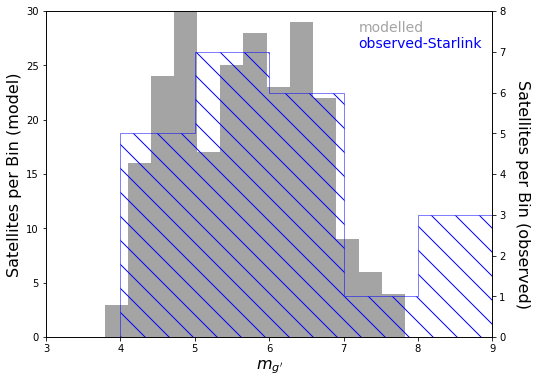

In [35]:
generate_fig(latitude=48.5)

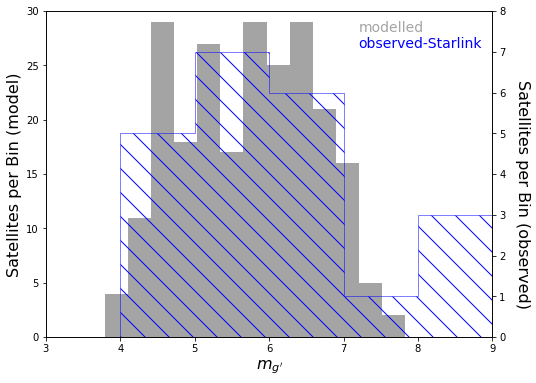

In [23]:
generate_fig(latitude=48.5)

In [24]:
generate_fig("hist_lamb.png", latitude=48.5)